In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
top = 400
bottom = 1850
sense = (bottom - top) / 15

In [13]:
# df = pd.read_csv("toilet_highres.csv")
df = pd.read_csv("toilet_highres.csv", nrows = 5000)

df = df.truncate(before = 800)
df.rename(columns={'255':'raw'}, inplace=True)

avg50 = df.rolling(window=50).mean()
avg50.rename(columns={'raw':'rolling_avg_50'}, inplace=True)

avg500 = df.rolling(window=500).mean()
avg500.rename(columns={'raw':'rolling_avg_500'}, inplace=True)

avg1000 = df.rolling(window=2000).mean()
avg1000.rename(columns={'raw':'rolling_avg_1000'}, inplace=True)

df_concat = pd.concat([df, avg50, avg500, avg1000], axis=1)
df_concat.insert(0, 'time', range(-1120, -1120 + len(df)))

df_concat.insert(0, 'top', top)
df_concat.insert(0, 'bottom', bottom)
df_concat.insert(0, 'sense', sense)


df_concat.insert(0, 'diff50_1000', df_concat['rolling_avg_1000'] - df_concat['rolling_avg_50'])
df_concat.insert(0, 'diff500_1000', df_concat['rolling_avg_500'] -df_concat['rolling_avg_1000'])


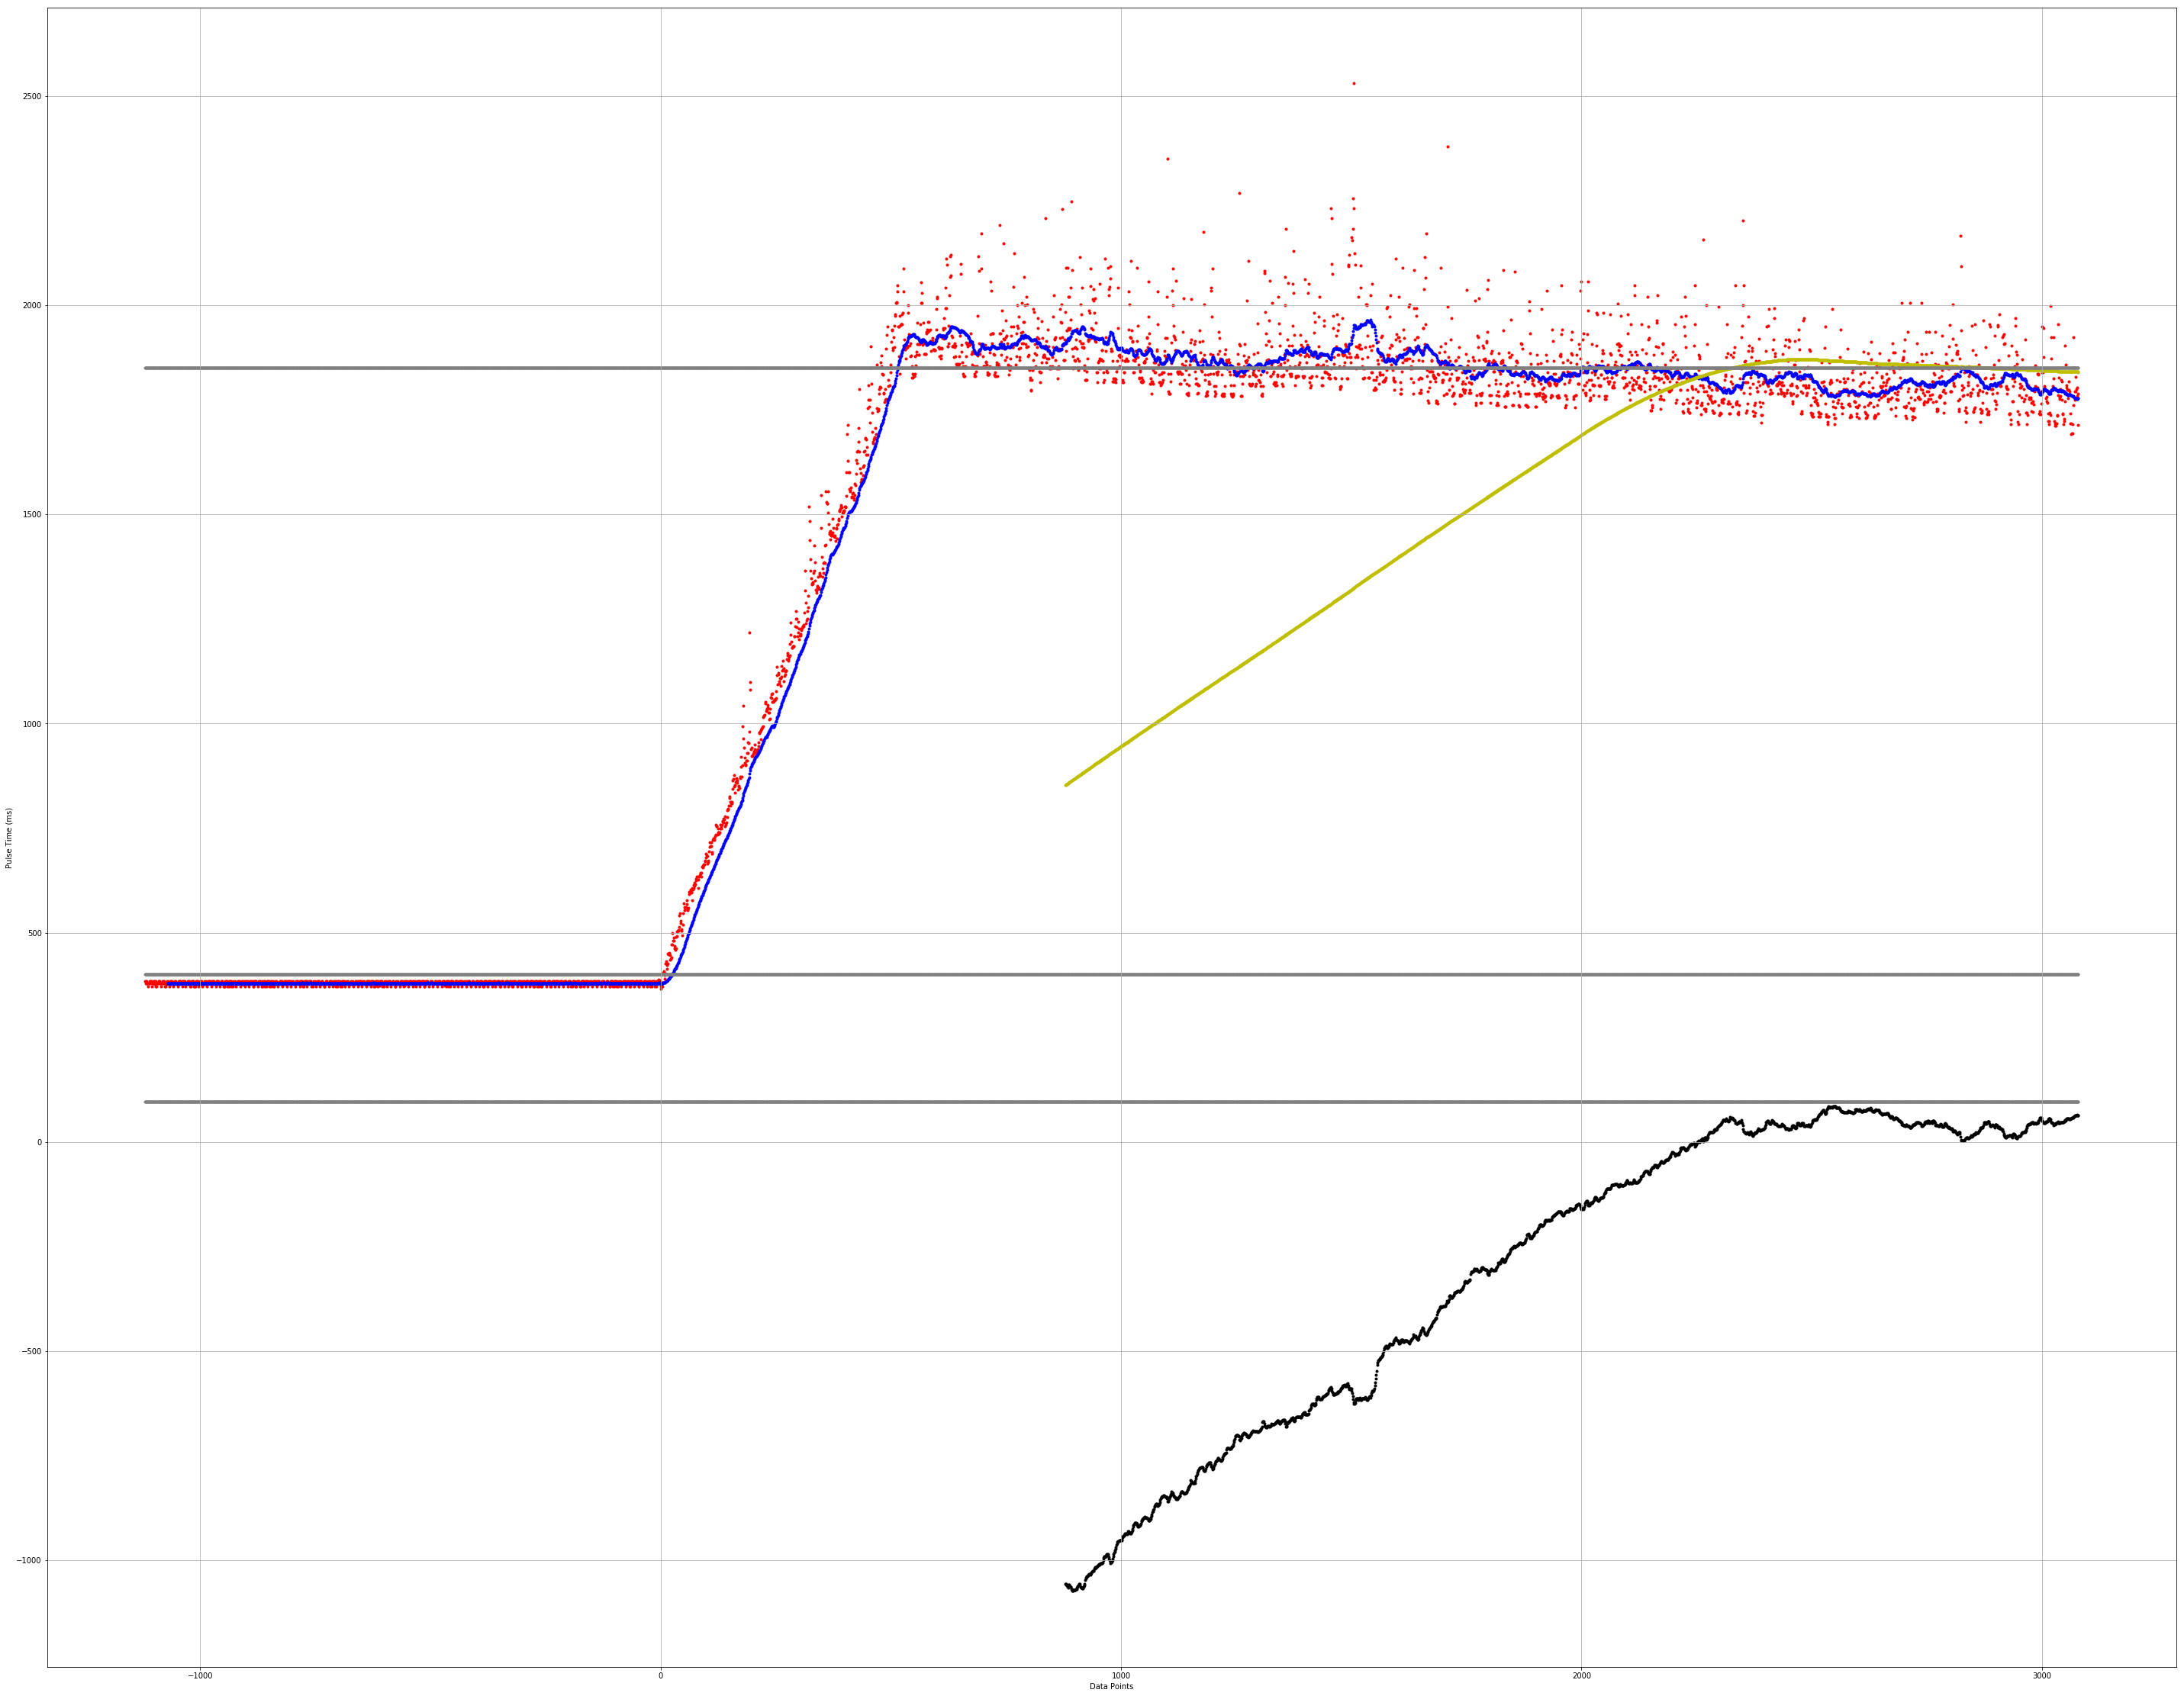

In [14]:
plt.figure(figsize=(50,40))
plt.scatter(df_concat['time'], df_concat['raw'], color='r', marker='.')
plt.scatter(df_concat['time'], df_concat['rolling_avg_50'], color='b', marker='.')
plt.scatter(df_concat['time'], df_concat['rolling_avg_1000'], color='y', marker='.')

plt.scatter(df_concat['time'], df_concat['diff50_1000'], color='black', marker='.')
# plt.scatter(df_concat['time'], df_concat['diff500_1000'], color='gray', marker='.')

plt.scatter(df_concat['time'], df_concat['top'], color='gray', marker='.')
plt.scatter(df_concat['time'], df_concat['bottom'], color='gray', marker='.')
plt.scatter(df_concat['time'], df_concat['sense'], color='gray', marker='.')


plt.xlabel('Data Points')
plt.ylabel('Pulse Time (ms)')
plt.grid(which='both')
plt.show()